PHASE-1.A — Load Datasets + Basic Integrity Checks

In [1]:
import pandas as pd
import numpy as np

# Display options
pd.set_option('display.max_columns', None)

fraud_path = "../data/raw/fraud_data.csv"
ip_path = "../data/raw/ip.csv"

fraud_df = pd.read_csv(fraud_path)
ip_df = pd.read_csv(ip_path)

fraud_df.head(), fraud_df.shape, ip_df.shape


(   user_id      signup_time   purchase_time  purchase_value      device_id  \
 0    22058  2/24/2015 22:55  4/18/2015 2:47              34  QVPSPJUOCKZAR   
 1   333320   6/7/2015 20:39   6/8/2015 1:38              16  EOGFQPIZPYXFZ   
 2     1359   1/1/2015 18:52  1/1/2015 18:52              15  YSSKYOSJHPPLJ   
 3   150084  4/28/2015 21:13  5/4/2015 13:54              44  ATGTXKYKUDUQN   
 4   221365   7/21/2015 7:09  9/9/2015 18:40              39  NAUITBZFJKHWW   
 
   source browser sex  age    ip_address  class  
 0    SEO  Chrome   M   39  7.327584e+08      0  
 1    Ads  Chrome   F   53  3.503114e+08      0  
 2    SEO   Opera   M   53  2.621474e+09      1  
 3    SEO  Safari   M   41  3.840542e+09      0  
 4    Ads  Safari   M   45  4.155831e+08      0  ,
 (151112, 11),
 (138846, 3))

Check column info

In [3]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


Missing value check

In [4]:
fraud_df.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Duplicate check

In [6]:
fraud_df.duplicated().sum()

np.int64(0)

PHASE-1.B Cleaning Fraud Data
onvert datetime columns

In [7]:
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])


Fix IP address numeric issues

Your sample shows decimal IPs like 732758368.8 → must convert to integer

In [8]:
fraud_df['ip_address'] = fraud_df['ip_address'].astype(float).astype(int)


Remove duplicates

In [9]:
fraud_df = fraud_df.drop_duplicates()


In [10]:
fraud_df.info()
fraud_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  int64         
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 12.7+ MB


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:00,2015-04-18 02:47:00,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0
1,333320,2015-06-07 20:39:00,2015-06-08 01:38:00,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0
2,1359,2015-01-01 18:52:00,2015-01-01 18:52:00,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1
3,150084,2015-04-28 21:13:00,2015-05-04 13:54:00,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542444,0
4,221365,2015-07-21 07:09:00,2015-09-09 18:40:00,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0


PHASE-1.C — Clean IP Dataset

In [14]:
ip_df.info()
ip_df.isnull().sum()
print(ip_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   lower_bound_ip_address  138846 non-null  int64 
 1   upper_bound_ip_address  138846 non-null  int64 
 2   country                 138846 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.2+ MB
0


In [12]:
# convert into int
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(int)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(int)


In [13]:
# Sort for merging later
ip_df = ip_df.sort_values('lower_bound_ip_address')


PHASE 2.A — Class Distribution (Imbalance Check)

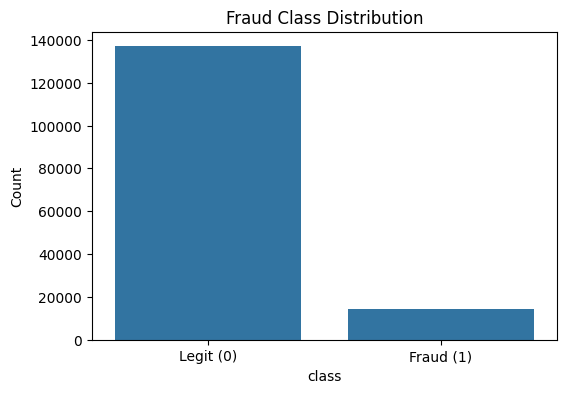

(class
 0    136961
 1     14151
 Name: count, dtype: int64,
 class
 0    0.906354
 1    0.093646
 Name: count, dtype: float64)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fraud_counts = fraud_df['class'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title("Fraud Class Distribution")
plt.xticks([0,1], ['Legit (0)', 'Fraud (1)'])
plt.ylabel("Count")
plt.show()

fraud_counts, fraud_counts / len(fraud_df)


Fraud cases (class = 1) are very small compared to legitimate.

Dataset is highly imbalanced

Justifies:

Using Precision / Recall / F1 / PR-AUC later

Using SMOTE / undersampling later

PHASE 2.B — Univariate EDA on Fraud Dataset

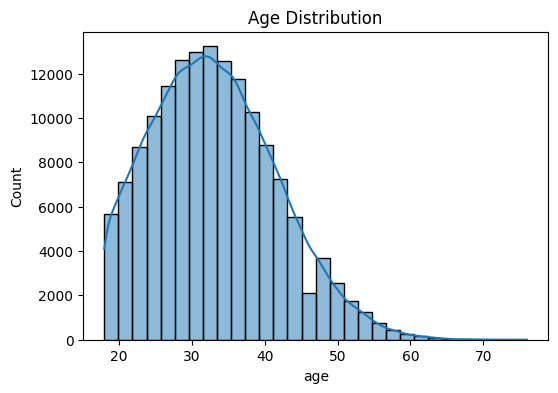

In [ ]:
# age distribution
plt.figure(figsize=(6,4))
sns.histplot(fraud_df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


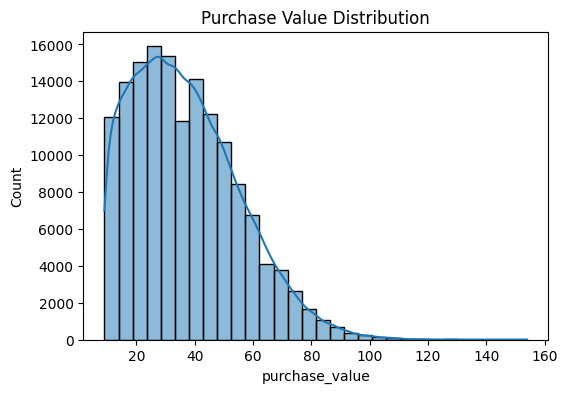

In [18]:
# purchase value distribution
plt.figure(figsize=(6,4))
sns.histplot(fraud_df['purchase_value'], bins=30, kde=True)
plt.title("Purchase Value Distribution")
plt.show()


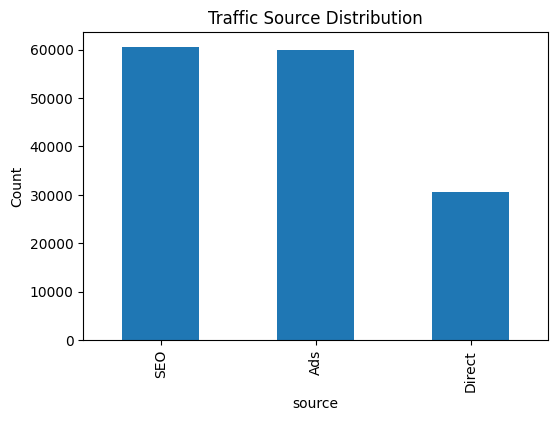

In [19]:
# source distribution
plt.figure(figsize=(6,4))
fraud_df['source'].value_counts().plot(kind='bar')
plt.title("Traffic Source Distribution")
plt.ylabel("Count")
plt.show()


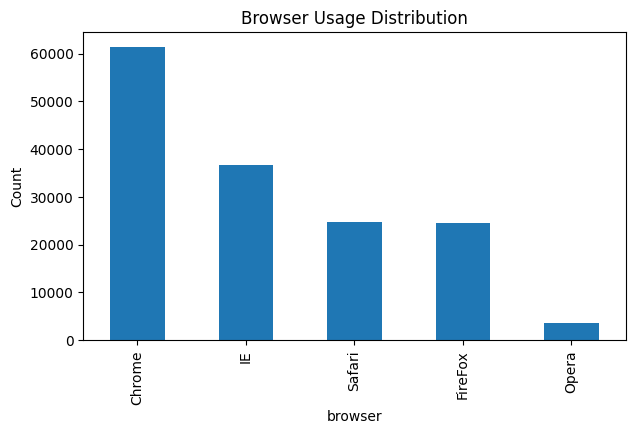

In [ ]:
# browser distribution
plt.figure(figsize=(7,4))
fraud_df['browser'].value_counts().plot(kind='bar')
plt.title("Browser Usage Distribution")
plt.ylabel("Count")
plt.show()


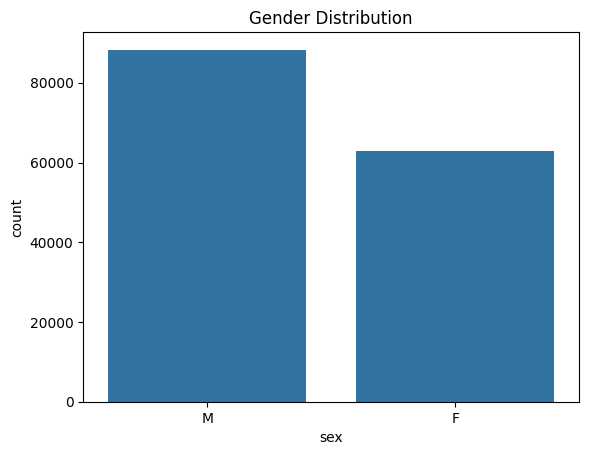

In [22]:
# sex distribution
sns.countplot(x='sex', data=fraud_df)
plt.title("Gender Distribution")
plt.show()


PHASE 2.C — Bivariate Analysis (Fraud vs Features)

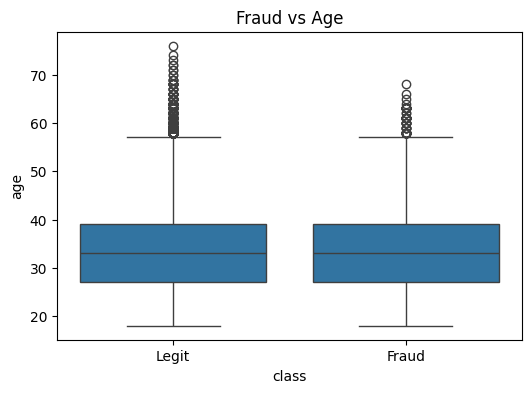

In [23]:
# fraud vs age
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='age', data=fraud_df)
plt.title("Fraud vs Age")
plt.xticks([0,1], ["Legit","Fraud"])
plt.show()


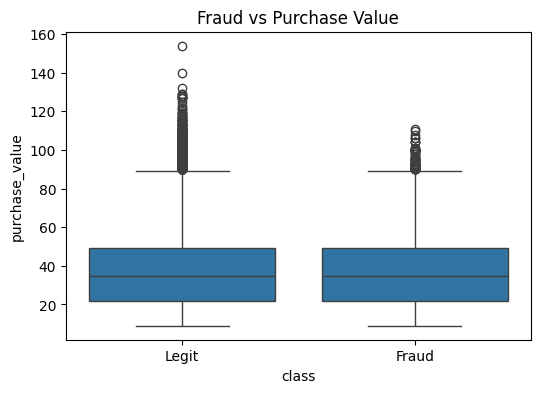

In [25]:
# fruad vs purchase value
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title("Fraud vs Purchase Value")
plt.xticks([0,1], ["Legit","Fraud"])
plt.show()



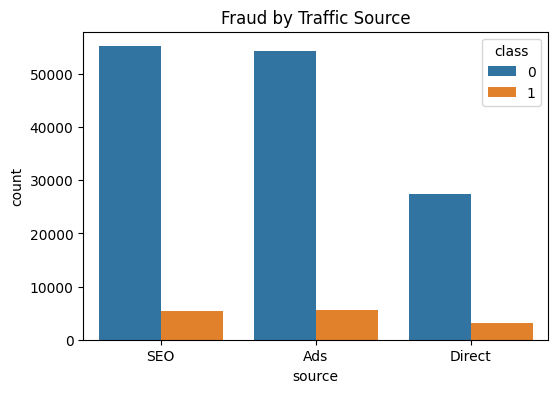

In [26]:
# fraud vs source
plt.figure(figsize=(6,4))
sns.countplot(x='source', hue='class', data=fraud_df)
plt.title("Fraud by Traffic Source")
plt.show()


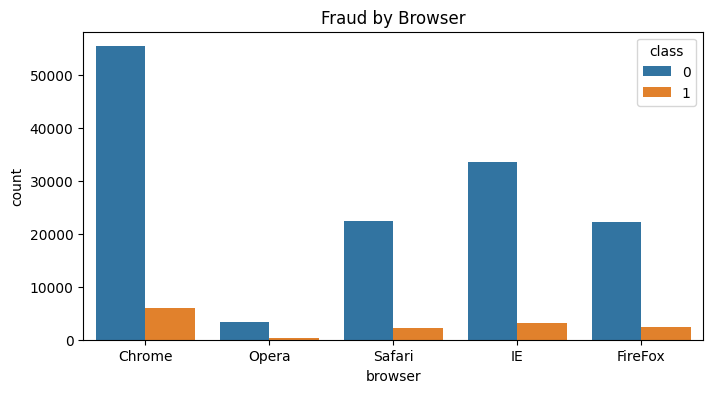

In [27]:
# fraud vs browser
plt.figure(figsize=(8,4))
sns.countplot(x='browser', hue='class', data=fraud_df)
plt.title("Fraud by Browser")
plt.show()


PHASE 2.D — Time-Based EDA (Important)

In [28]:
fraud_df['purchase_hour'] = fraud_df['purchase_time'].dt.hour
fraud_df['purchase_day'] = fraud_df['purchase_time'].dt.dayofweek


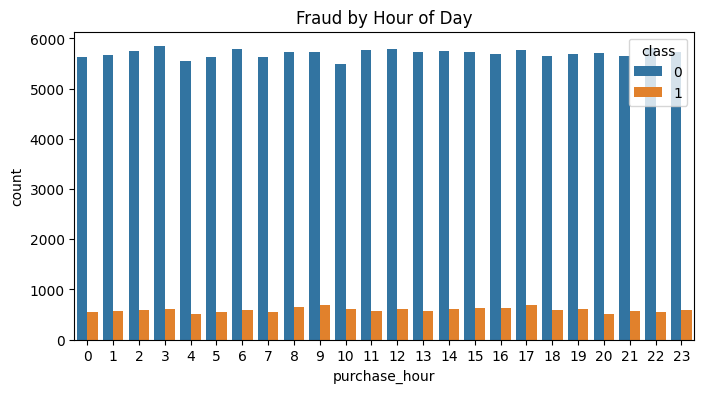

In [29]:
# fraud by hour
plt.figure(figsize=(8,4))
sns.countplot(x='purchase_hour', hue='class', data=fraud_df)
plt.title("Fraud by Hour of Day")
plt.show()


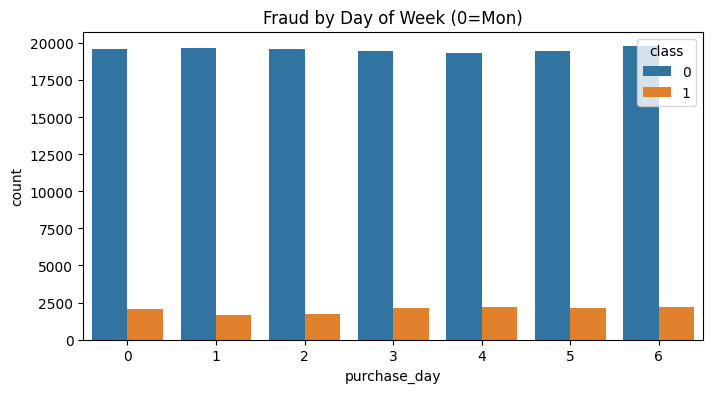

In [30]:
# fraud by week
plt.figure(figsize=(8,4))
sns.countplot(x='purchase_day', hue='class', data=fraud_df)
plt.title("Fraud by Day of Week (0=Mon)")
plt.show()


Efficient Country Mapping Method

In [31]:
ip_df = ip_df.sort_values('lower_bound_ip_address')
fraud_df = fraud_df.sort_values('ip_address')

fraud_geo = pd.merge_asof(
    fraud_df,
    ip_df,
    left_on="ip_address",
    right_on="lower_bound_ip_address",
    direction="backward"
)

fraud_geo = fraud_geo[
    fraud_geo['ip_address'] <= fraud_geo['upper_bound_ip_address']
]


In [ ]:
# How many transactions mapped to a country?
fraud_geo['country'].isnull().sum(), len(fraud_geo)


(np.int64(0), 129146)

In [ ]:
# Fraud by Country
country_fraud_counts = fraud_geo.groupby('country')['class'].value_counts().unstack().fillna(0)
country_fraud_counts.columns = ['Legit', 'Fraud']
country_fraud_counts = country_fraud_counts.sort_values('Fraud', ascending=False)

country_fraud_counts.head(10)


,Legit,Fraud
country,,
United States,52498.0,5551.0
China,10995.0,1043.0
Japan,6591.0,715.0
United Kingdom,4013.0,477.0
Korea Republic of,3782.0,380.0
Canada,2627.0,348.0
France,2861.0,300.0
Brazil,2691.0,270.0
Germany,3384.0,262.0


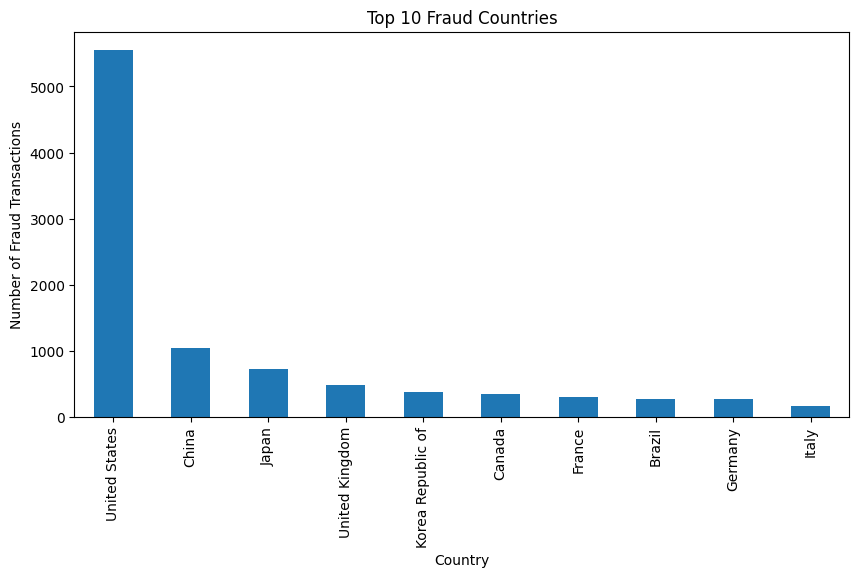

In [36]:
# visualize top fraud countries
top_fraud = country_fraud_counts.sort_values('Fraud', ascending=False).head(10)

top_fraud['Fraud'].plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Fraud Countries")
plt.ylabel("Number of Fraud Transactions")
plt.xlabel("Country")
plt.show()


In [38]:
# Fraud Rate per Country (More Insightful)
country_fraud_rate = (
    country_fraud_counts['Fraud'] /
    (country_fraud_counts['Fraud'] + country_fraud_counts['Legit'])
).sort_values(ascending=False)

country_fraud_rate.head(10)


country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Ecuador                  0.264151
Tunisia                  0.262712
Peru                     0.260504
Bolivia                  0.245283
Kuwait                   0.233333
dtype: float64

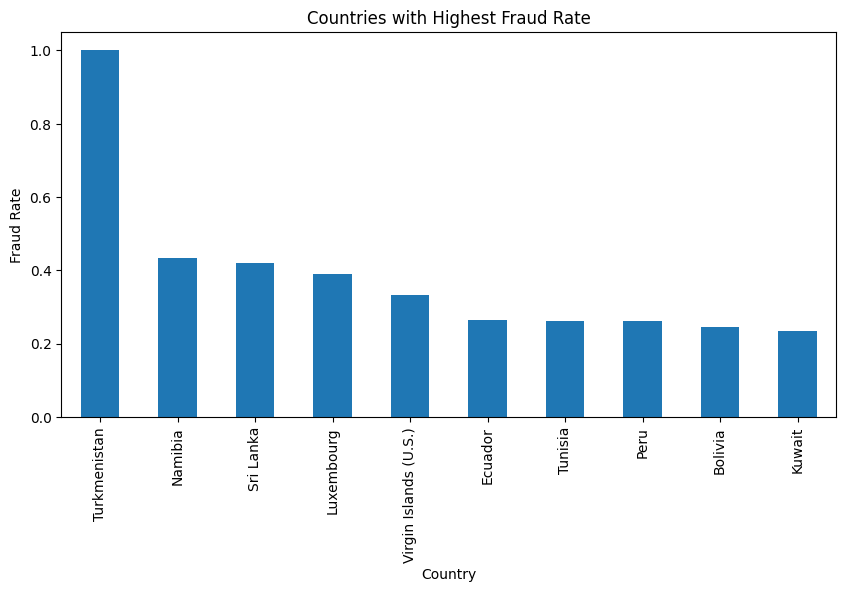

In [39]:
country_fraud_rate.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Countries with Highest Fraud Rate")
plt.ylabel("Fraud Rate")
plt.xlabel("Country")
plt.show()


In [40]:
# Time gap between signup and purchase
fraud_geo['time_diff'] = (fraud_geo['purchase_time'] - fraud_geo['signup_time']).dt.total_seconds() / 3600


In [41]:
fraud_geo.groupby('class')['time_diff'].describe()


,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,116878.0,1442.278011,830.254867,0.033333,720.254167,1444.3,2161.412500,2879.983333
1,12268.0,667.513566,919.495461,0.000000,0.000000,0.0,1316.241667,2878.883333


In [ ]:
# Extract Hour & Day
# Transaction Hour
fraud_geo['purchase_hour'] = fraud_geo['purchase_time'].dt.hour


In [43]:
# Day of week
fraud_geo['purchase_day'] = fraud_geo['purchase_time'].dt.day_name()


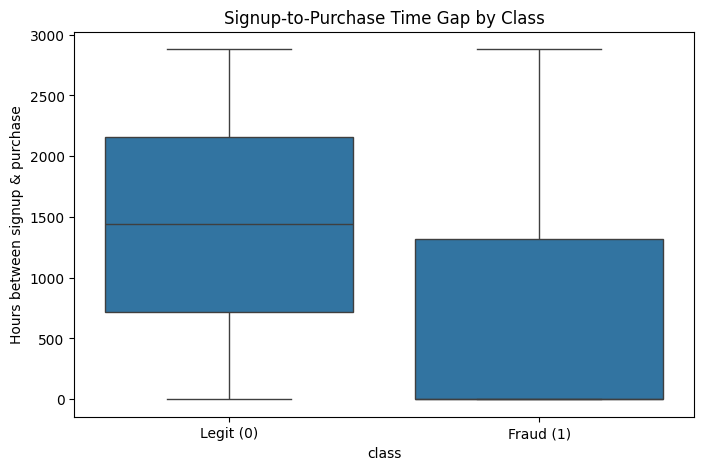

In [45]:
# Time difference : Fraud vs legit

plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='time_diff', data=fraud_geo)
plt.title("Signup-to-Purchase Time Gap by Class")
plt.xticks([0,1], ['Legit (0)', 'Fraud (1)'])
plt.ylabel("Hours between signup & purchase")
plt.show()


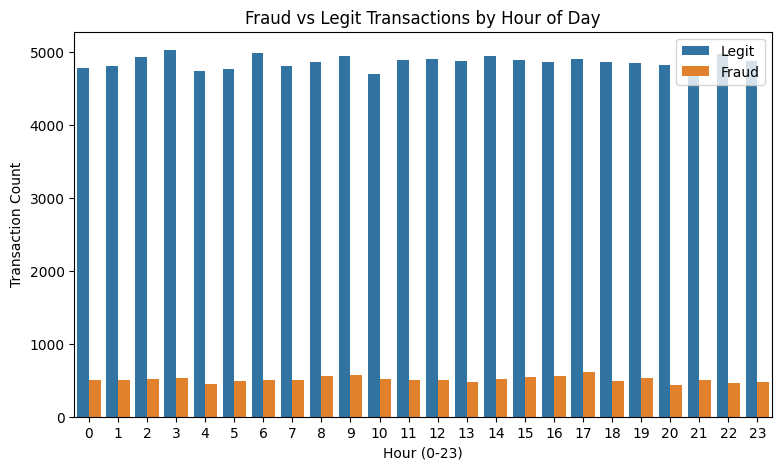

In [46]:
# Hourly Fraud Pattern
plt.figure(figsize=(9,5))
sns.countplot(data=fraud_geo, x='purchase_hour', hue='class')
plt.title("Fraud vs Legit Transactions by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Transaction Count")
plt.legend(['Legit', 'Fraud'])
plt.show()


<Figure size 900x500 with 0 Axes>

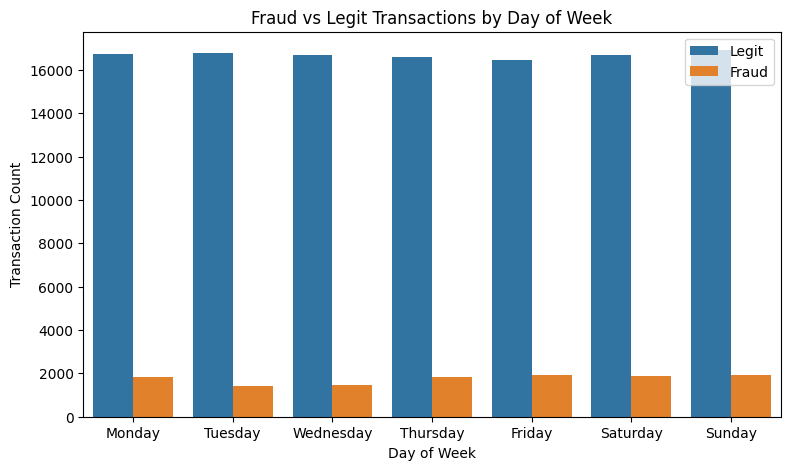

In [48]:
# day of a week fraud pattern
plt.figure(figsize=(9,5))
plt.figure(figsize=(9,5))
sns.countplot(data=fraud_geo, x='purchase_day', hue='class',
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Fraud vs Legit Transactions by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Transaction Count")
plt.legend(['Legit', 'Fraud'])
plt.show()

